In [35]:
from cideMOD import (
    CellParser,
    ErrorCheck,
    NDProblem,
    Problem,
    SolverCrashed,
    Trigger,
    init_results_folder,
    ModelOptions,
)

import os
import numpy as np
import matplotlib.pyplot as plt
import time as tm

Data + Define model

In [36]:
#Path til Chen data
import importlib

importlib.reload(Problem)

#print(importlib.sys.modules)
overwrite = True
case = "Chen_2020"
data_path = "/home/andreas/Documents/SINTEF_code_review/cidemod/cideMOD/data/data_{}".format(case)
params = "params_tuned.json"

C_rate = -1
I_app = -5 #C_rate * problem.Q
t_f = 3600 /abs(C_rate)*1.25
v_min = Trigger(2.5, "v")
#P4D modell
#Vi setter i=5 for å se om vi får noe nyttig
i=6
model_options = ModelOptions(mode='P4D', clean_on_exit=False,N_x=i,N_y=i,N_z=i)
cell = CellParser(params, data_path=data_path)
problem = Problem(cell, model_options)
#Set SOC, Text, Tint
problem.set_cell_state(1, 273 + 25, 273 + 25)
problem.setup(mesh_engine='GmshMesher')

ImportError: module Problem not in sys.modules

In [21]:
#Check cell structure
print(cell.structure)

['a', 's', 'c']


Løsning av problemet.
Merk: allerede i en 10x10x10 konfigurasjon kan dette ta opp mot en time

In [13]:
#min_step=36 betyr at simulasjonen bruker ca 100 steg hver gang 
status = problem.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

Solving ...
initializing solution
Voltage is 2.5 V at 3554.19 s 0	Time: 58min 48s



Hva inneholder den løsningen vi får nå?

In [14]:
print(problem.WH.global_vars.keys())

dict_keys(['voltage', 'current', 'capacity'])


In [15]:
print(problem.WH.global_var_arrays)

[[0.0, 36.0, 72.0, 108.0, 144.0, 180.0, 216.0, 252.0, 288.0, 324.0, 360.0, 396.0, 432.0, 468.0, 504.0, 540.0, 576.0, 612.0, 648.0, 684.0, 720.0, 756.0, 792.0, 828.0, 864.0, 900.0, 936.0, 972.0, 1008.0, 1044.0, 1080.0, 1116.0, 1152.0, 1188.0, 1224.0, 1260.0, 1296.0, 1332.0, 1368.0, 1404.0, 1440.0, 1476.0, 1512.0, 1548.0, 1584.0, 1620.0, 1656.0, 1692.0, 1728.0, 1764.0, 1800.0, 1836.0, 1872.0, 1908.0, 1944.0, 1980.0, 2016.0, 2052.0, 2088.0, 2124.0, 2160.0, 2196.0, 2232.0, 2268.0, 2304.0, 2340.0, 2376.0, 2412.0, 2448.0, 2484.0, 2520.0, 2556.0, 2592.0, 2628.0, 2664.0, 2700.0, 2736.0, 2772.0, 2808.0, 2844.0, 2880.0, 2916.0, 2952.0, 2988.0, 3024.0, 3060.0, 3096.0, 3132.0, 3168.0, 3204.0, 3240.0, 3276.0, 3312.0, 3348.0, 3384.0, 3420.0, 3456.0, 3492.0, 3528.0, 3554.1869281026948, 3555.108110286779], [4.180872219481423, 3.983739461674425, 3.9544872940915012, 3.942410546859624, 3.936537995336672, 3.931175757227032, 3.924338593215226, 3.915260610828024, 3.9045123587351704, 3.8928170202334154, 3.88

Plot tid vs voltage

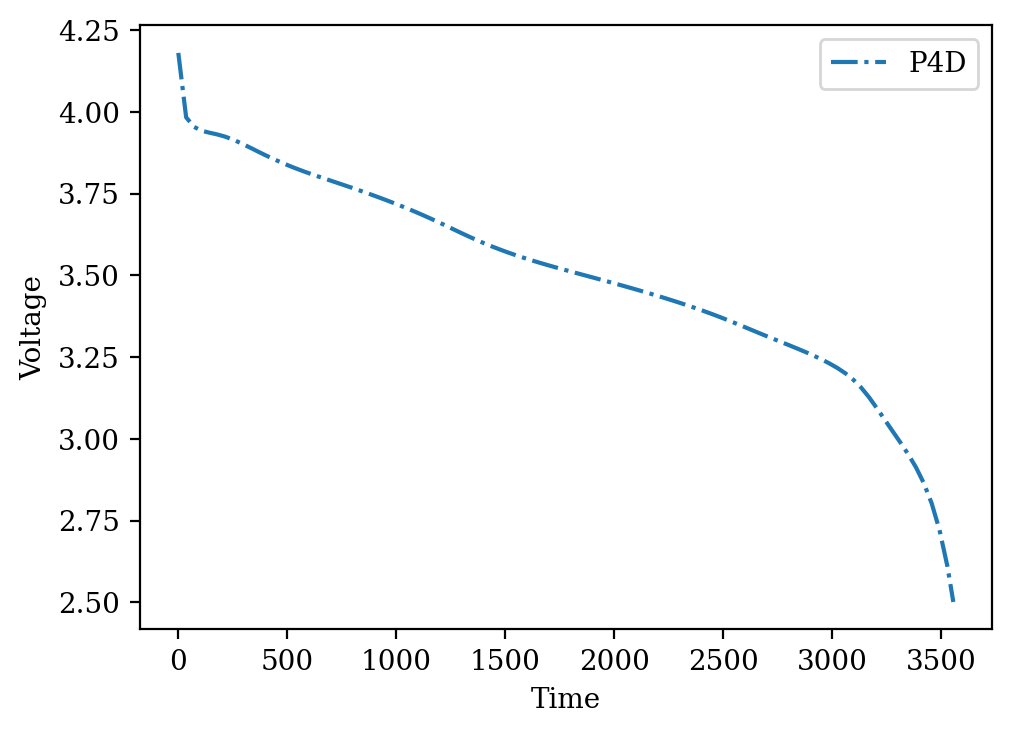

In [16]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax1.plot(problem.WH.global_var_arrays[0], problem.WH.global_var_arrays[1], "-.")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage")
ax1.legend(["P4D"], loc="best")

Plot current vs tid

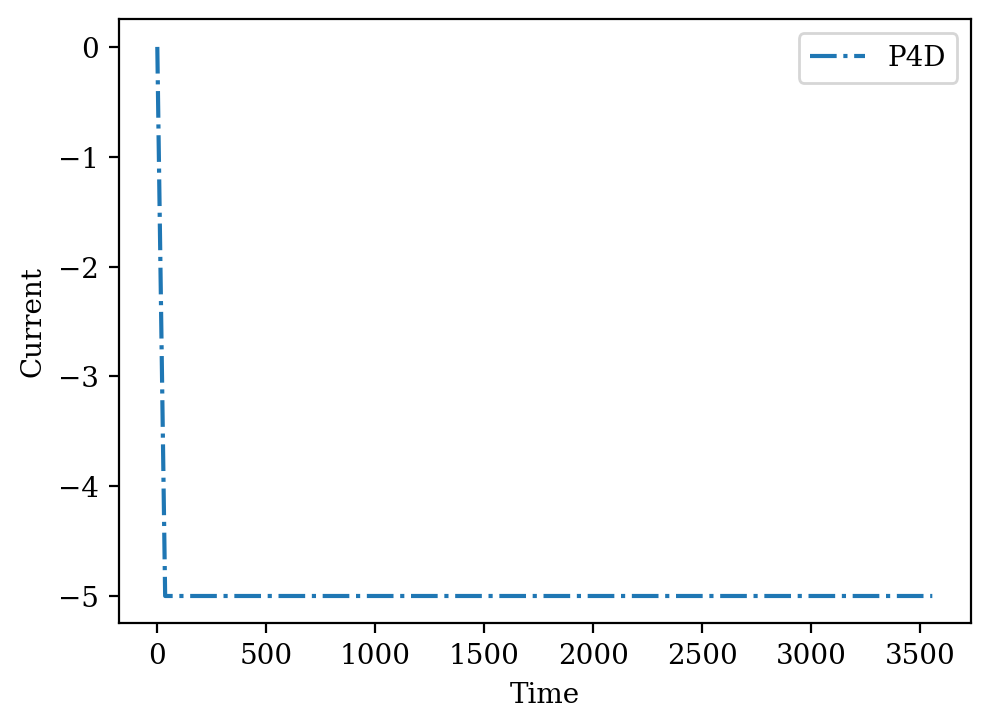

In [17]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax2 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax2.plot(problem.WH.global_var_arrays[0], problem.WH.global_var_arrays[2], "-.")
ax2.set_xlabel("Time")
ax2.set_ylabel("Current")
ax2.legend(["P4D"], loc="best")

Time vs capacity

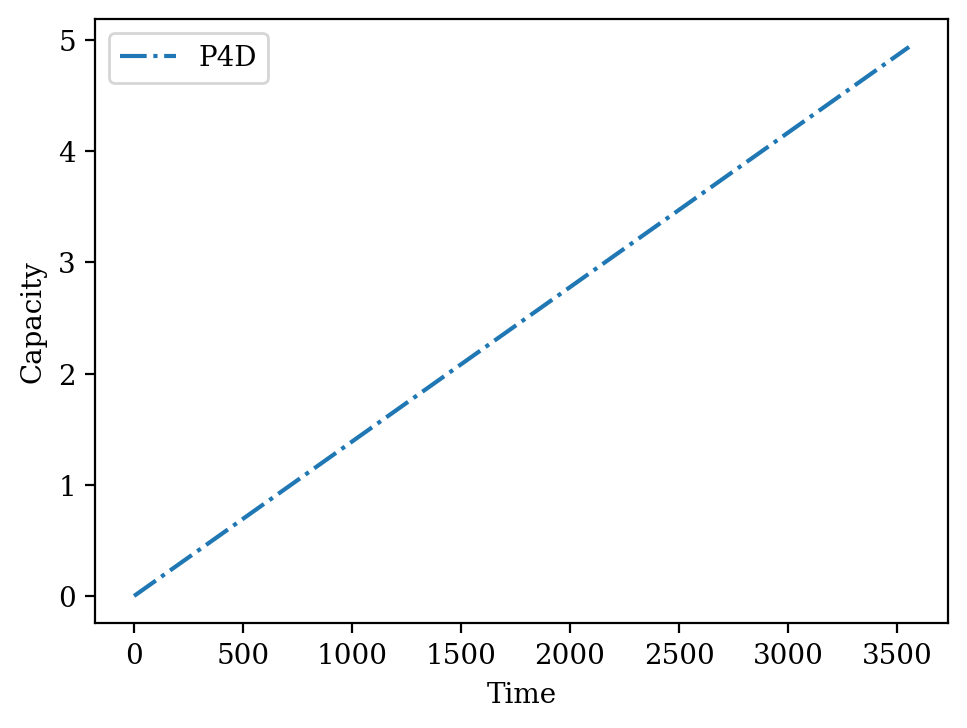

In [18]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax2 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax2.plot(problem.WH.global_var_arrays[0], problem.WH.global_var_arrays[3], "-.")
ax2.set_xlabel("Time")
ax2.set_ylabel("Capacity")
ax2.legend(["P4D"], loc="best")

In [20]:
type(problem.mesh)

method